In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
column_list = df_market_data.columns.tolist()
print(column_list)


['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [7]:
# Create a DataFrame with the scaled data
df_w_names = df_scaled.copy()
# Copy the crypto names from the original data
df_w_names['coin_id'] = df_market_data.index
# Set the coinid column as index

df_w_names.set_index('coin_id', inplace=True)
# Display sample data
df_w_names.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [8]:
column_list = df_w_names.columns.tolist()
print(column_list)

['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']


---

### Find the Best Value for k Using the Original Data.

In [9]:
X = df_w_names

In [10]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12))

In [11]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")


Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()


# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head(20)


,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754
9,11,24.964638,0.229807,31.488784,-3.200795


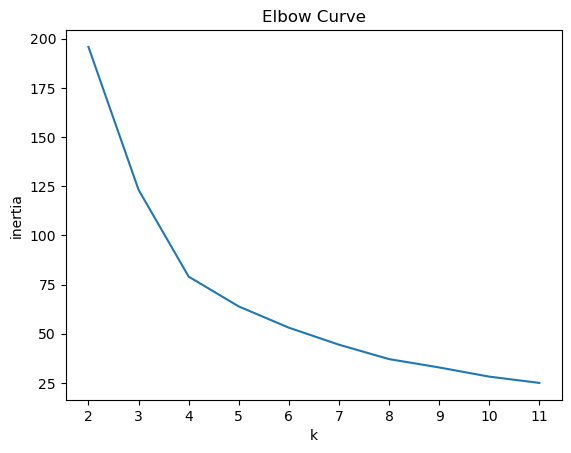

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
df_sub = df_scaled.copy()
model = KMeans(n_clusters=4, random_state=1)


In [15]:
# Fit the K-Means model using the scaled data
model.fit(X)


KMeans(n_clusters=4, random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)


# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [17]:
# Create a copy of the DataFrame
df_sub2 = df_sub.copy()


In [18]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = preds

df_sub2['coin_id'] = df_market_data.index

df_sub2.set_index('coin_id', inplace=True)

# Display sample data
df_sub2.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_sub2.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters",
    hover_cols=["coin_id"],
    xlabel="Price Change Percentage 24h",
    ylabel="Price Change Percentage 7d"
).opts(width=600, height=400)


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3

In [21]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

pca=PCA(n_components=n_components)
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index

# View the first five rows of the DataFrame. 
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [22]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Based on what was returned with pca.explained_variance_ratio, the total of 0.3719856 + 0.34700813 + 0.17603793 is 0.89503166.  Or 89.50%

In [23]:
# Create a new DataFrame with the PCA data.
df_pca2 = df_pca.copy()

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca2['coin_id'] = df_market_data.index

# Set the coinid column as index

df_pca2.set_index('coin_id', inplace=True)

# Display sample data
df_pca2.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values from 1 to 11
X = df_pca2
k = list(range(2, 12))

In [25]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)

df_elbow2["acc"] = df_elbow2.inertia.diff()

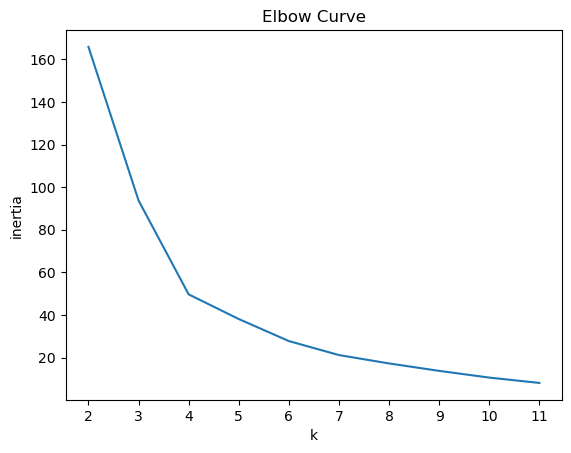

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow2["k"], df_elbow2["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow2["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 or 5, but it still seems that 4 offers the most drastic shift.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, both sets of data suggest that 4 clusters are the best.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=1)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=5, random_state=1)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[4 4 0 0 4 4 4 4 4 0 3 0 0 4 0 0 3 0 4 0 3 4 3 0 0 0 0 3 4 3 0 0 2 0 3 0 1
 3 0 0 0]


In [31]:
# Create a copy of the DataFrame with the PCA data
df_sub3 = df_pca2.copy()


# Add a new column to the DataFrame with the predicted clusters
df_sub3['clusters'] = preds


# Display sample data
df_sub3.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,4
ethereum,-0.458261,0.458466,0.952877,4
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,4


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_sub3.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    c="clusters",
    hover_cols=["coin_id"],
    xlabel="Price Change 1",
    ylabel="Price Change 2"
).opts(width=600, height=400)

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

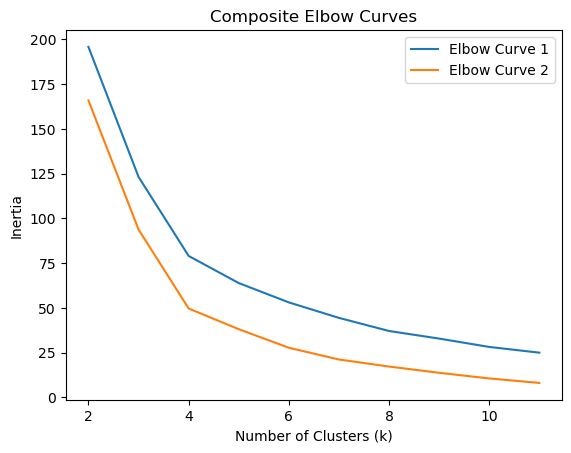

In [33]:
# Composite plot to contrast the Elbow curves

plt.plot(elbow_data["k"], elbow_data["inertia"], label="Elbow Curve 1")
plt.plot(elbow_data2["k"], elbow_data2["inertia"], label="Elbow Curve 2")


plt.title("Composite Elbow Curves")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.show()

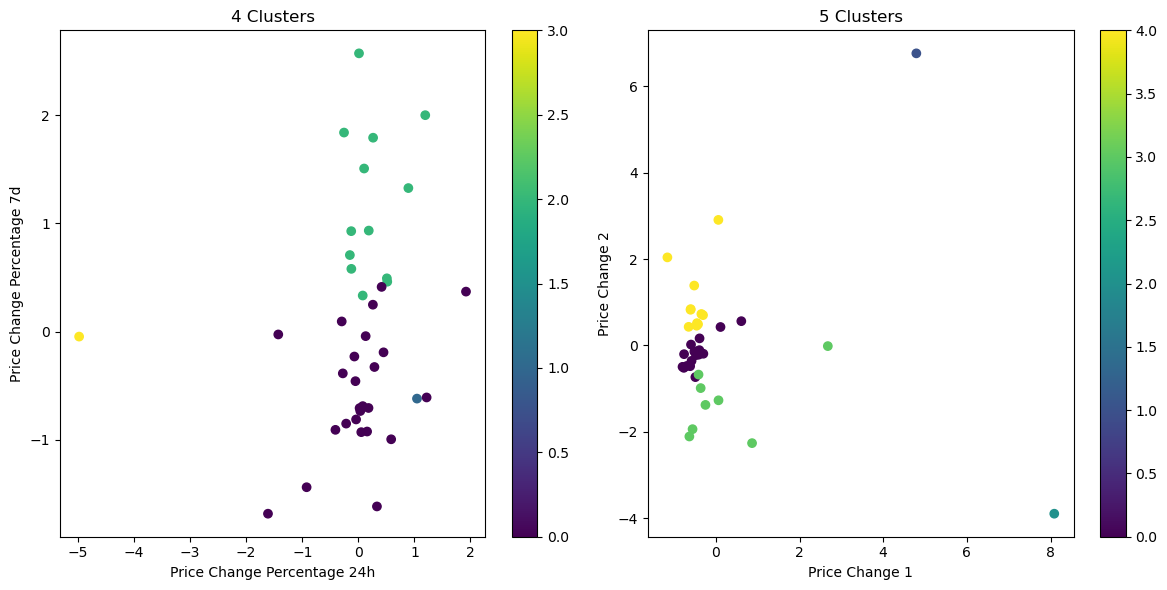

In [36]:
# Composite plot to contrast the clusters:  


# Note:  This was taken from the xpert and adapted to fit with the previously defined variables.


plt.figure(figsize=(12, 6))

# Plot the clusters from the first dataset
plt.subplot(1, 2, 1)
plt.scatter(df_sub2['price_change_percentage_24h'], df_sub2['price_change_percentage_7d'], c=df_sub2['clusters'], cmap='viridis')
plt.title('4 Clusters')
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.colorbar()

# Plot the clusters from the second dataset
plt.subplot(1, 2, 2)
plt.scatter(df_sub3['PCA_1'], df_sub3['PCA_2'], c=df_sub3['clusters'], cmap='viridis')
plt.title('5 Clusters')
plt.xlabel('Price Change 1')
plt.ylabel('Price Change 2')
plt.colorbar()

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using 4 clusters as opposed to 5 helps to show that the changes are a bit more segregated.  In both clusters there are 2 coins that are outliers.  But for the main body there there is much less overlap and expansive coverage.